# <center> *USA - Country Report* <center/>
## <center> *Date: 06.12.2020* <center/>
## <center> *By: Tal Levi* <center/>

In [1]:
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
country = Country('usa')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [3]:
print(country)


Countries name: China
Countries id: 215
Continent: Asia
Continent id: 3
Population: 1439323776
First update: 2020-08-02
Last update: 2020-12-06
Data number of rows: 111
Data number of columns: 18
Columns: 
['scrap_date', 'scrap_time', 'update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [4]:
df.dtypes

scrap_date         datetime64[ns]
scrap_time                 object
update_time_GMT            object
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical           float64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [5]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


null_count
scrap_date                0
scrap_time                0
update_time_GMT          58
Country_id                0
Country                   0
Population                0
TotalCases                0
NewCases                  1
TotalDeaths               0
NewDeaths                 1
TotalRecovered            0
NewRecovered              1
ActiveCases               0
SeriousCritical           1
Tot_Cases_1Mpop           0
Deaths_1Mpop              0
TotalTests                0
Tests_1Mpop               0

In [6]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


scrap_date scrap_time update_time_GMT  Country_id Country  Population  \
0 2020-08-02   20:00:00             NaN         215   China  1439323776   
1 2020-08-08   20:00:00             NaN         215   China  1439323776   
2 2020-08-12   20:00:00             NaN         215   China  1439323776   
3 2020-08-16   20:00:00             NaN         215   China  1439323776   
4 2020-08-17   20:00:00             NaN         215   China  1439323776   

   TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  \
0       84385       nan         4634        nan           79003           nan   
1       84596   211.000         4634      0.000           79123       120.000   
2       84737   141.000         4634      0.000           79342       219.000   
3       84827    90.000         4634      0.000           79575       233.000   
4       84849    22.000         4634      0.000           79603        28.000   

   ActiveCases  SeriousCritical  Tot_Cases_1Mpop  Deaths_1Mpop  TotalTests  \
0          748           36.000               59         3.000    90410000   
1          839           42.000               59         3.000    90410000   
2          761           40.000               59         3.000    90410000   
3          618           34.000               59         3.000    90410000   
4          612           30.000               59         3.000    90410000   

   Tests_1Mpop  
0        62814  
1        62814  
2        62814  
3        62814  
4        62814

In [7]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


scrap_date scrap_time update_time_GMT  Country_id Country  Population  \
106 2020-12-02   23:00:00        20:58:00         215   China  1439323776   
107 2020-12-03   23:00:00        20:59:00         215   China  1439323776   
108 2020-12-04   23:00:00        20:57:00         215   China  1439323776   
109 2020-12-05   23:00:00        20:58:00         215   China  1439323776   
110 2020-12-06   23:00:00        20:51:00         215   China  1439323776   

     TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
106       86551     9.000         4634      0.000           81649   
107       86567    16.000         4634      0.000           81667   
108       86584    17.000         4634      0.000           81679   
109       86601    17.000         4634      0.000           81694   
110       86619    18.000         4634      0.000           81706   

     NewRecovered  ActiveCases  SeriousCritical  Tot_Cases_1Mpop  \
106        18.000          268            8.000               60   
107        18.000          266            6.000               60   
108        12.000          271            5.000               60   
109        15.000          273            6.000               60   
110        12.000          279            6.000               60   

     Deaths_1Mpop  TotalTests  Tests_1Mpop  
106         3.000   160000000       111163  
107         3.000   160000000       111163  
108         3.000   160000000       111163  
109         3.000   160000000       111163  
110         3.000   160000000       111163

### Part Two - Data Visualization
#### Cumulative data

In [8]:
country.linear_plot(['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases'],save = True)

Successfully created the directory china.


#### Three months measures

In [9]:
months_info = country.three_months_info()
months_info

Year Month ActiveCasesAvg RecoveredSum DeathsSum CasesSum CriticalSum
0  2020   Sep        173.071          401         0      355          87
1  2020   Oct        244.533          406         0      570         100
2  2020   Nov        356.600          635         0      557         177

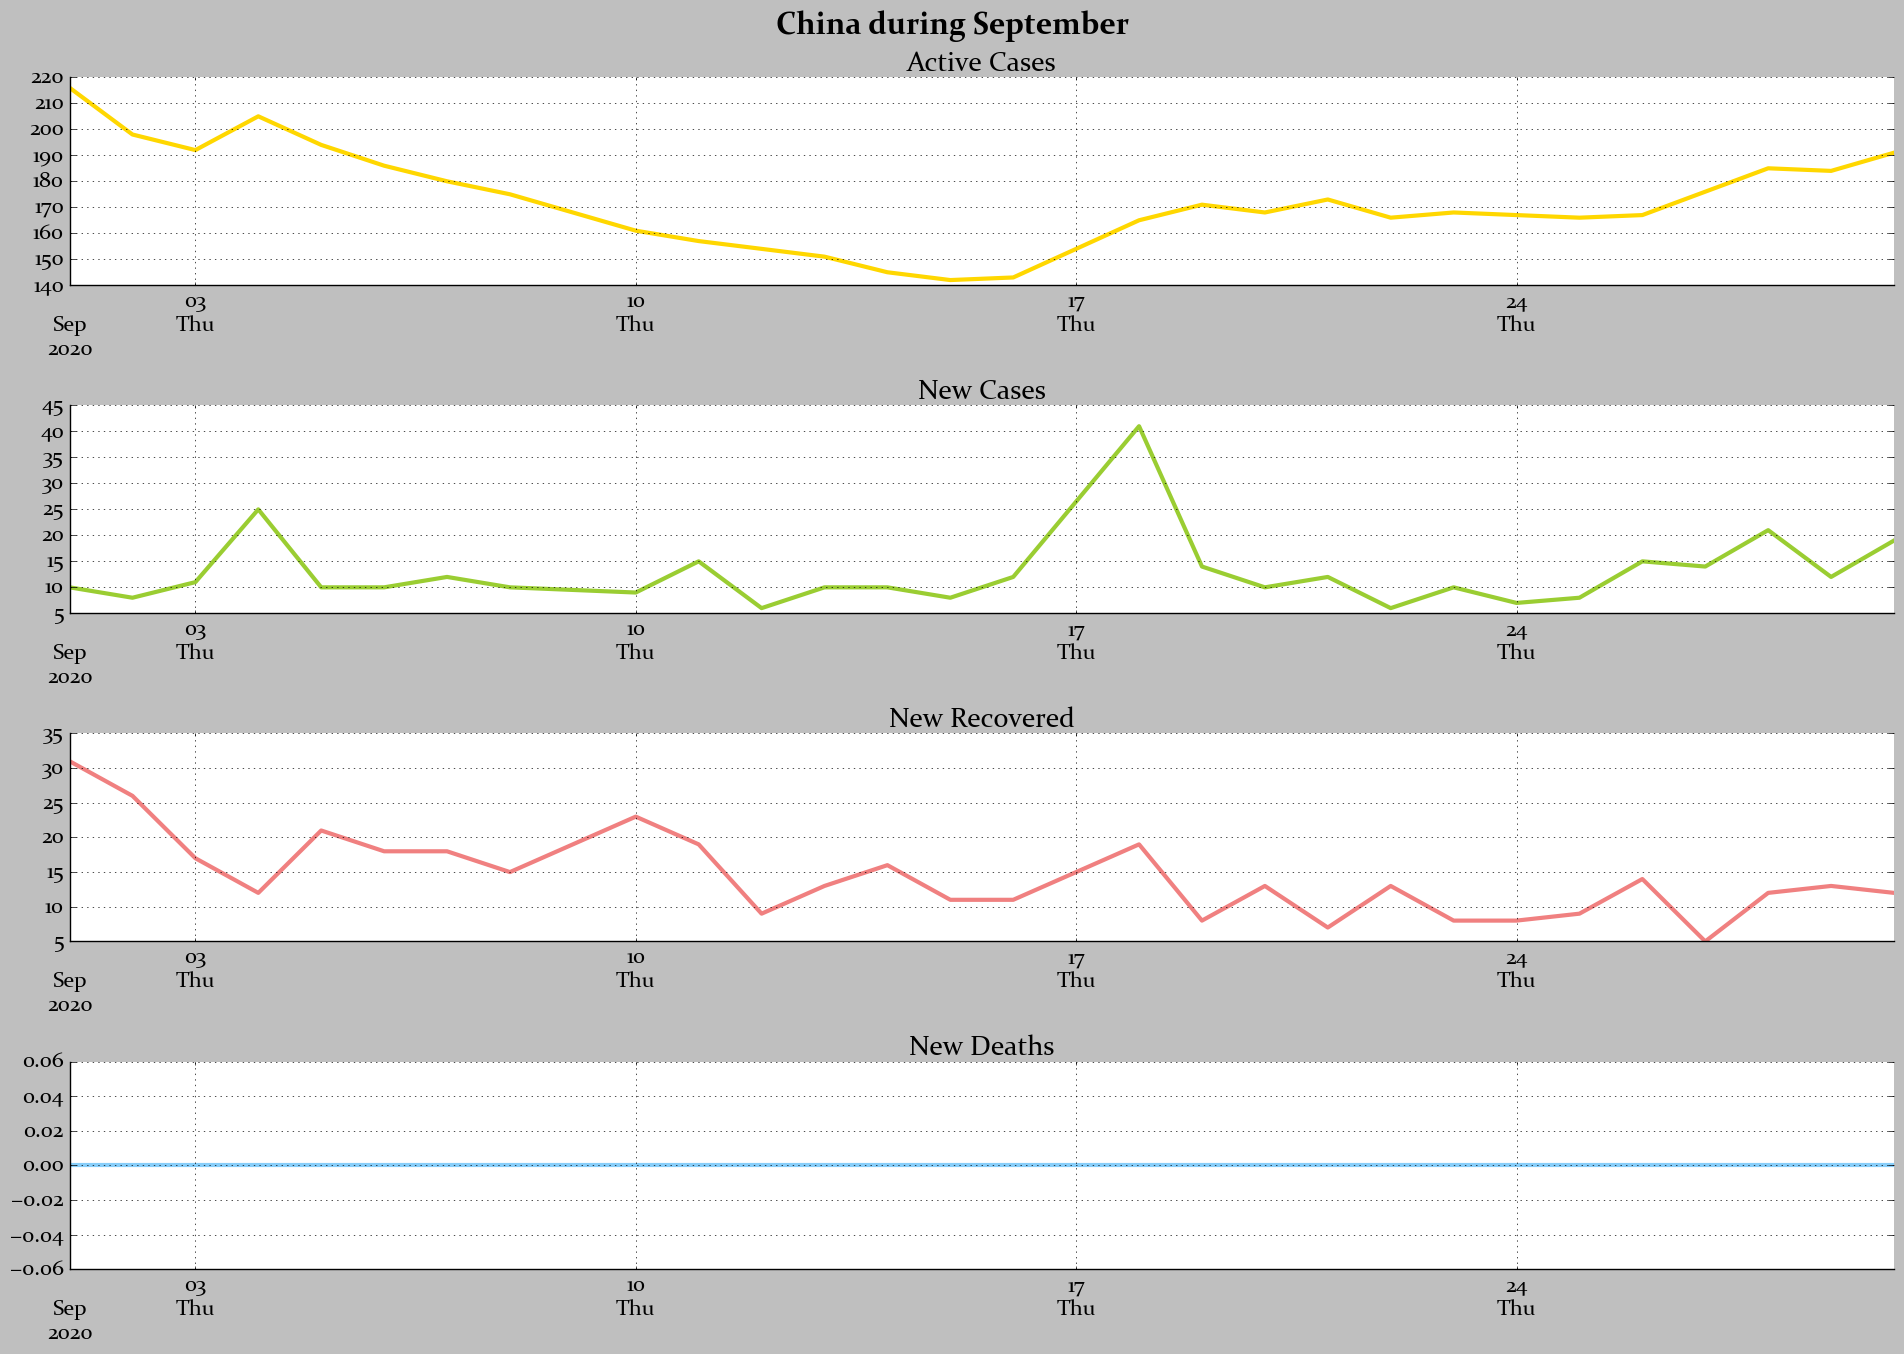

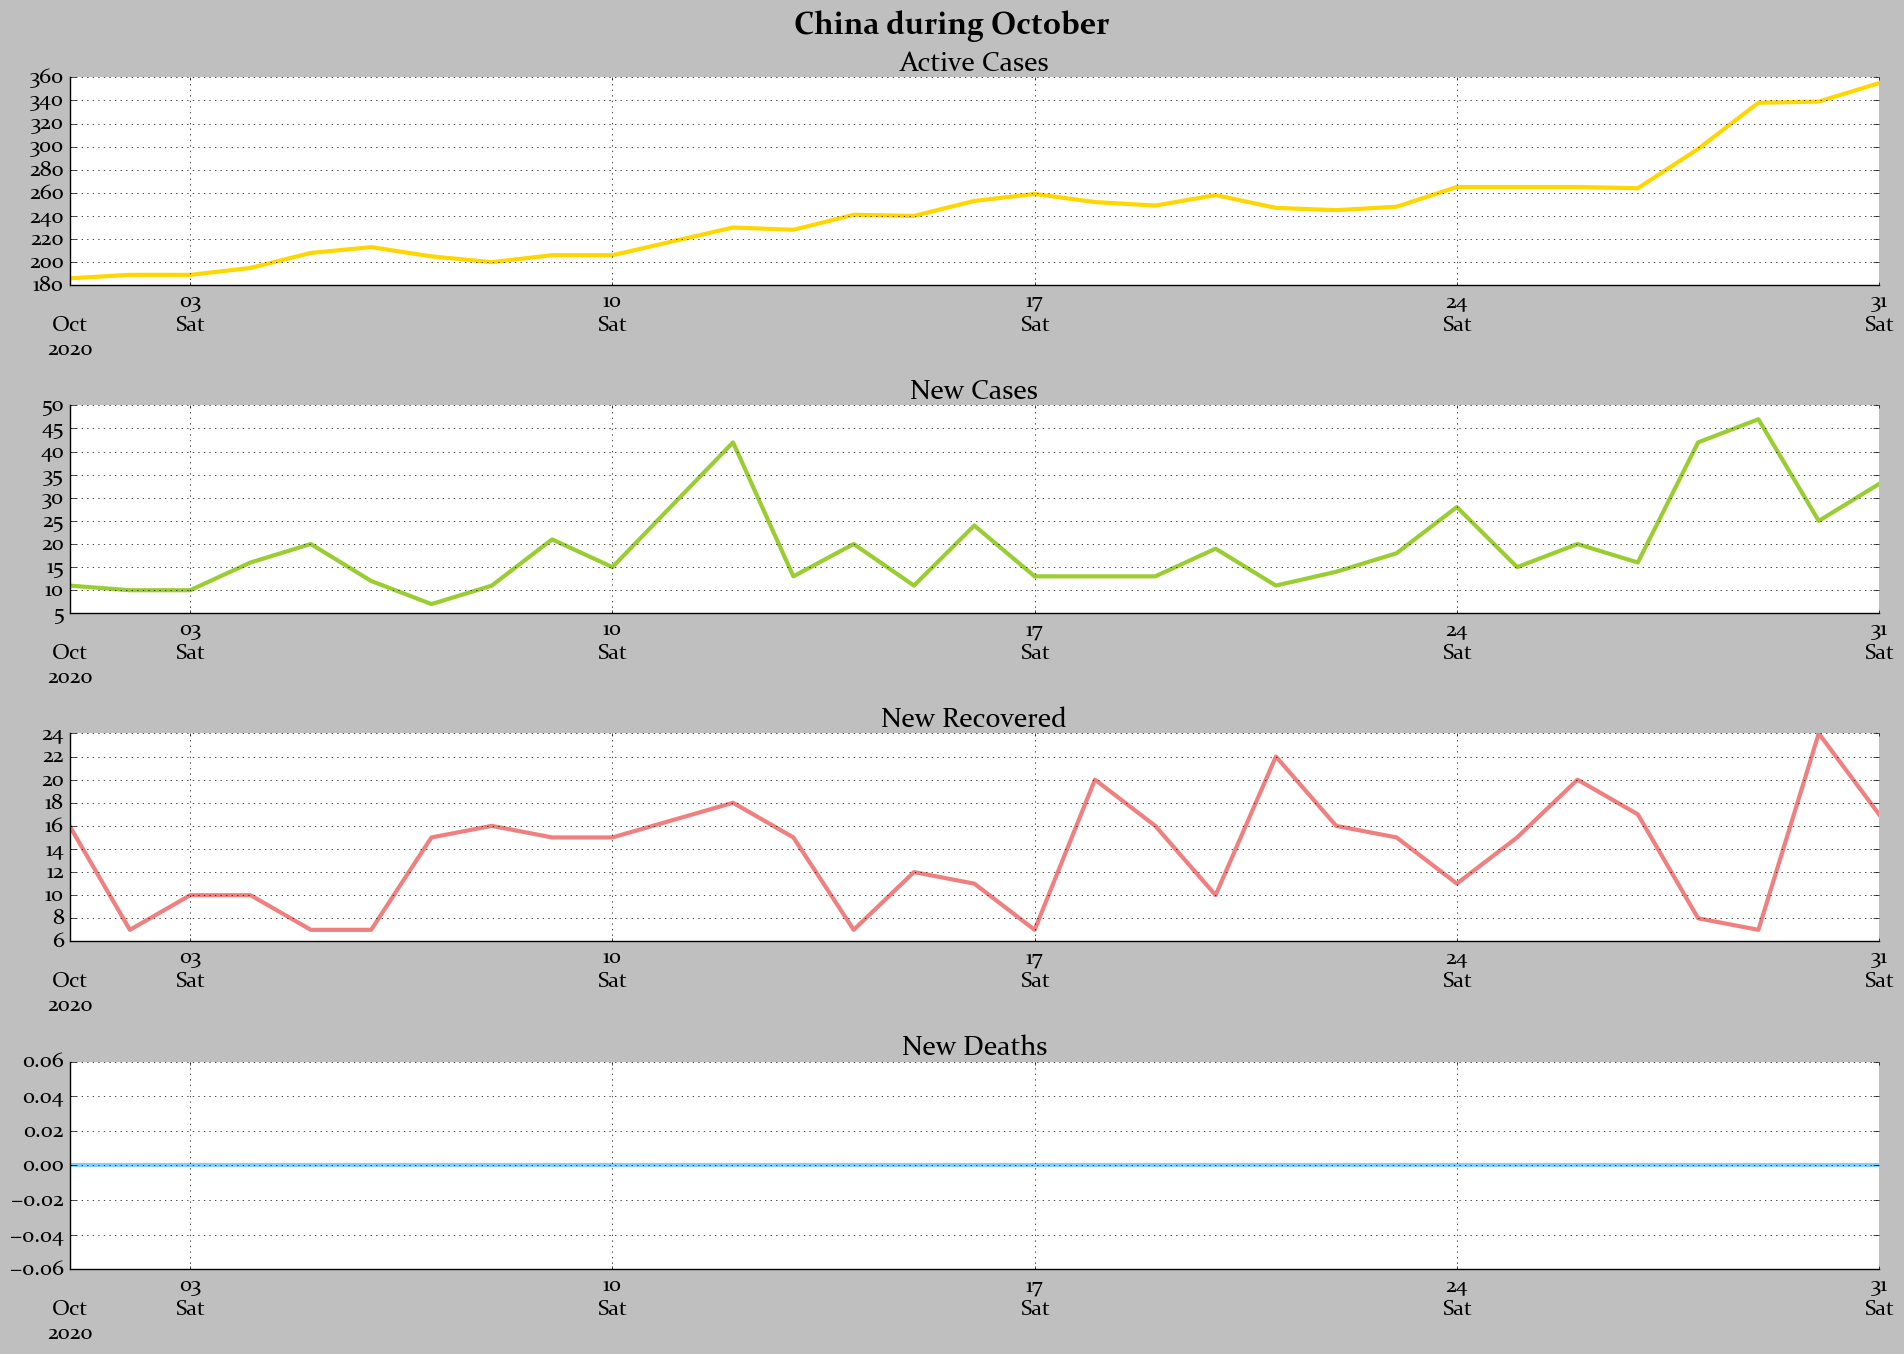

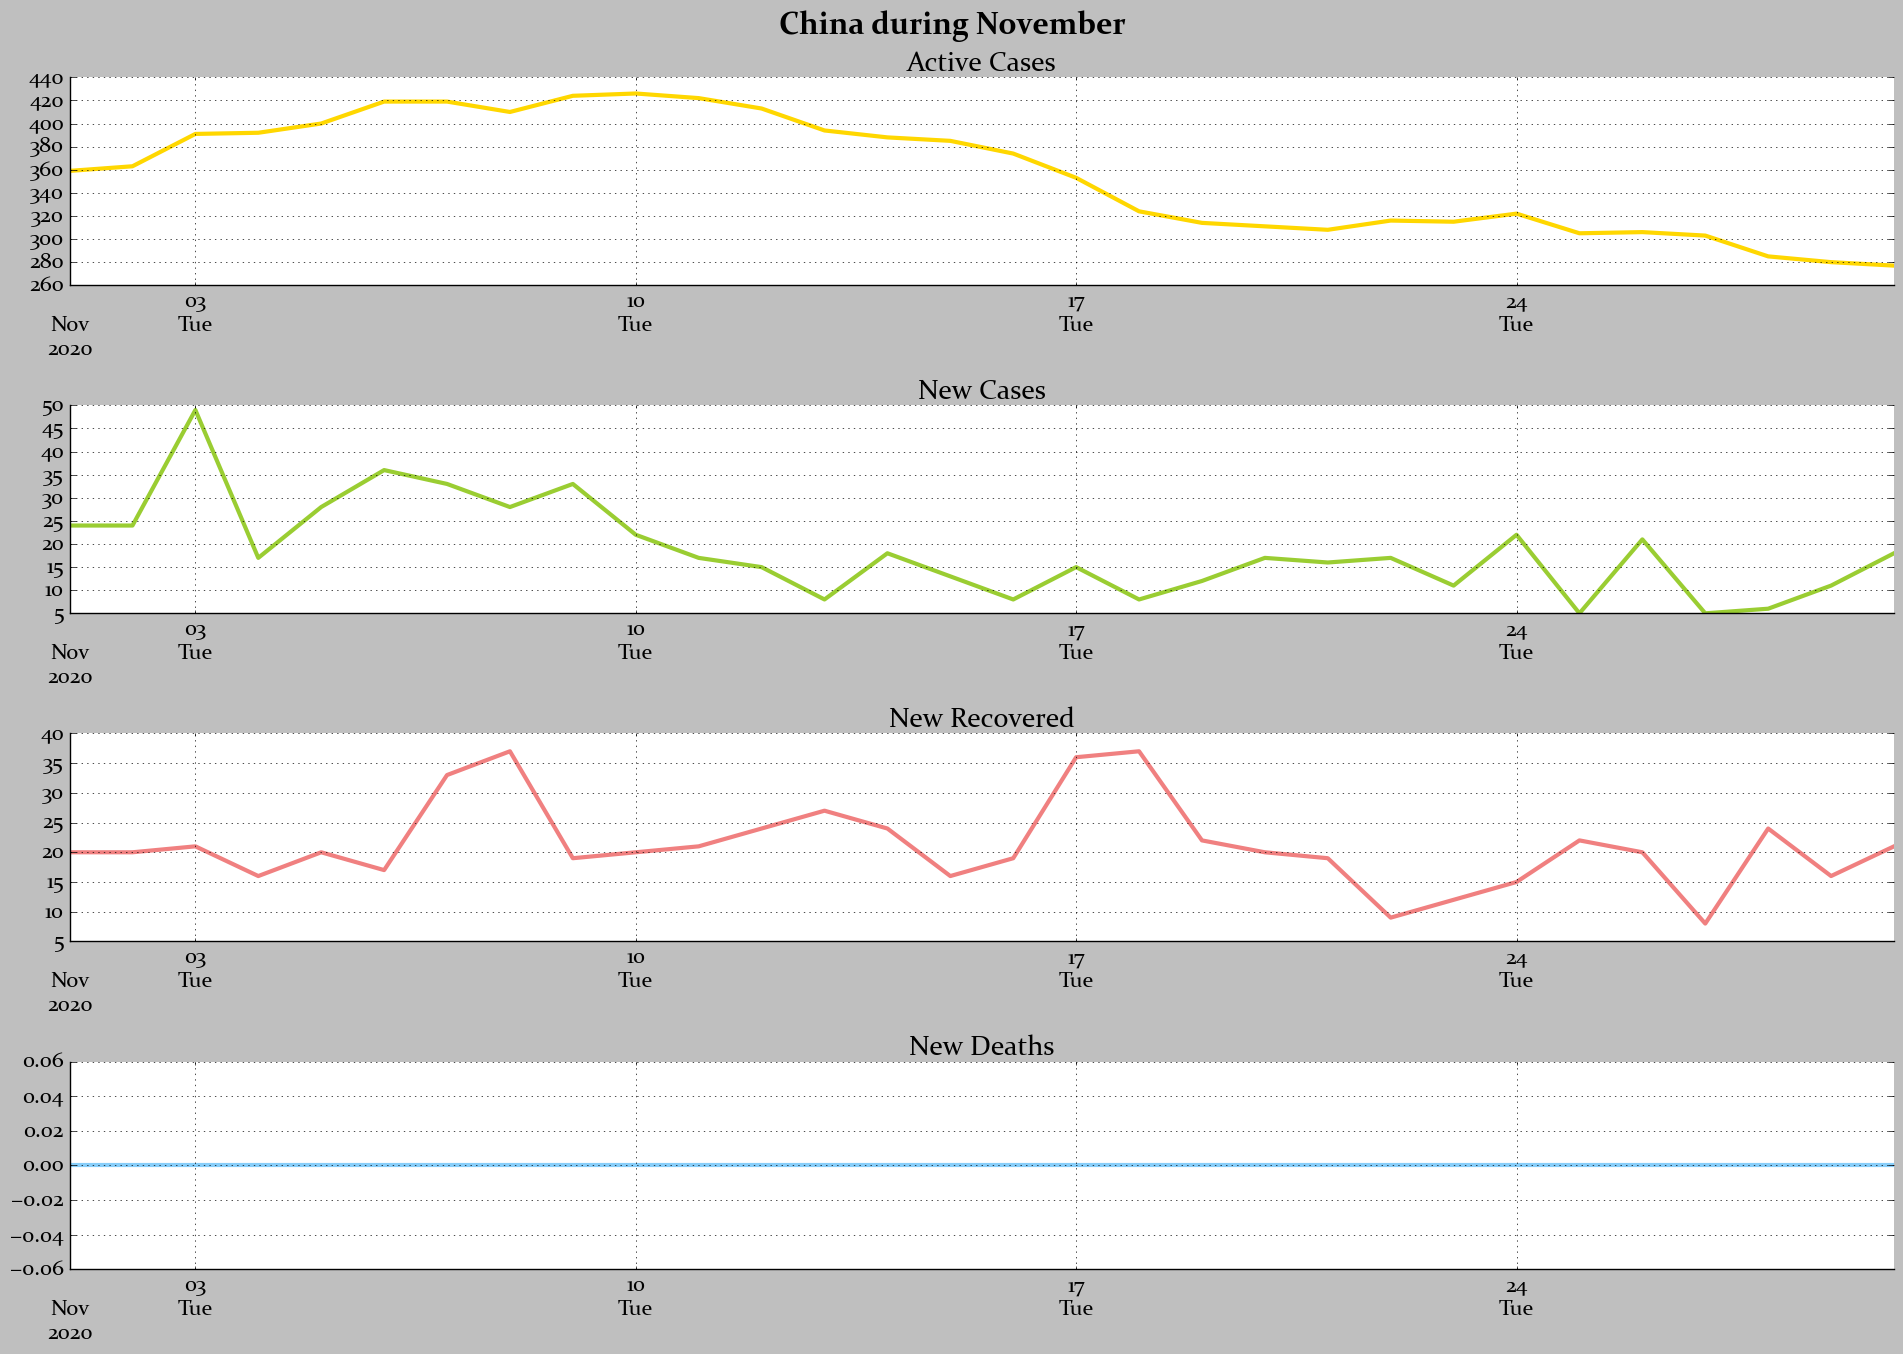

In [10]:
monthName = datetime(1900, date.today().month, 1).strftime('%B')
for month in months_info['Month'].tolist():
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases','NewCases','NewRecovered','NewDeaths'],month_num,date.today().year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

Answer:
Total time taken in daily_increase function is: 0.010750000000000001 minutes.


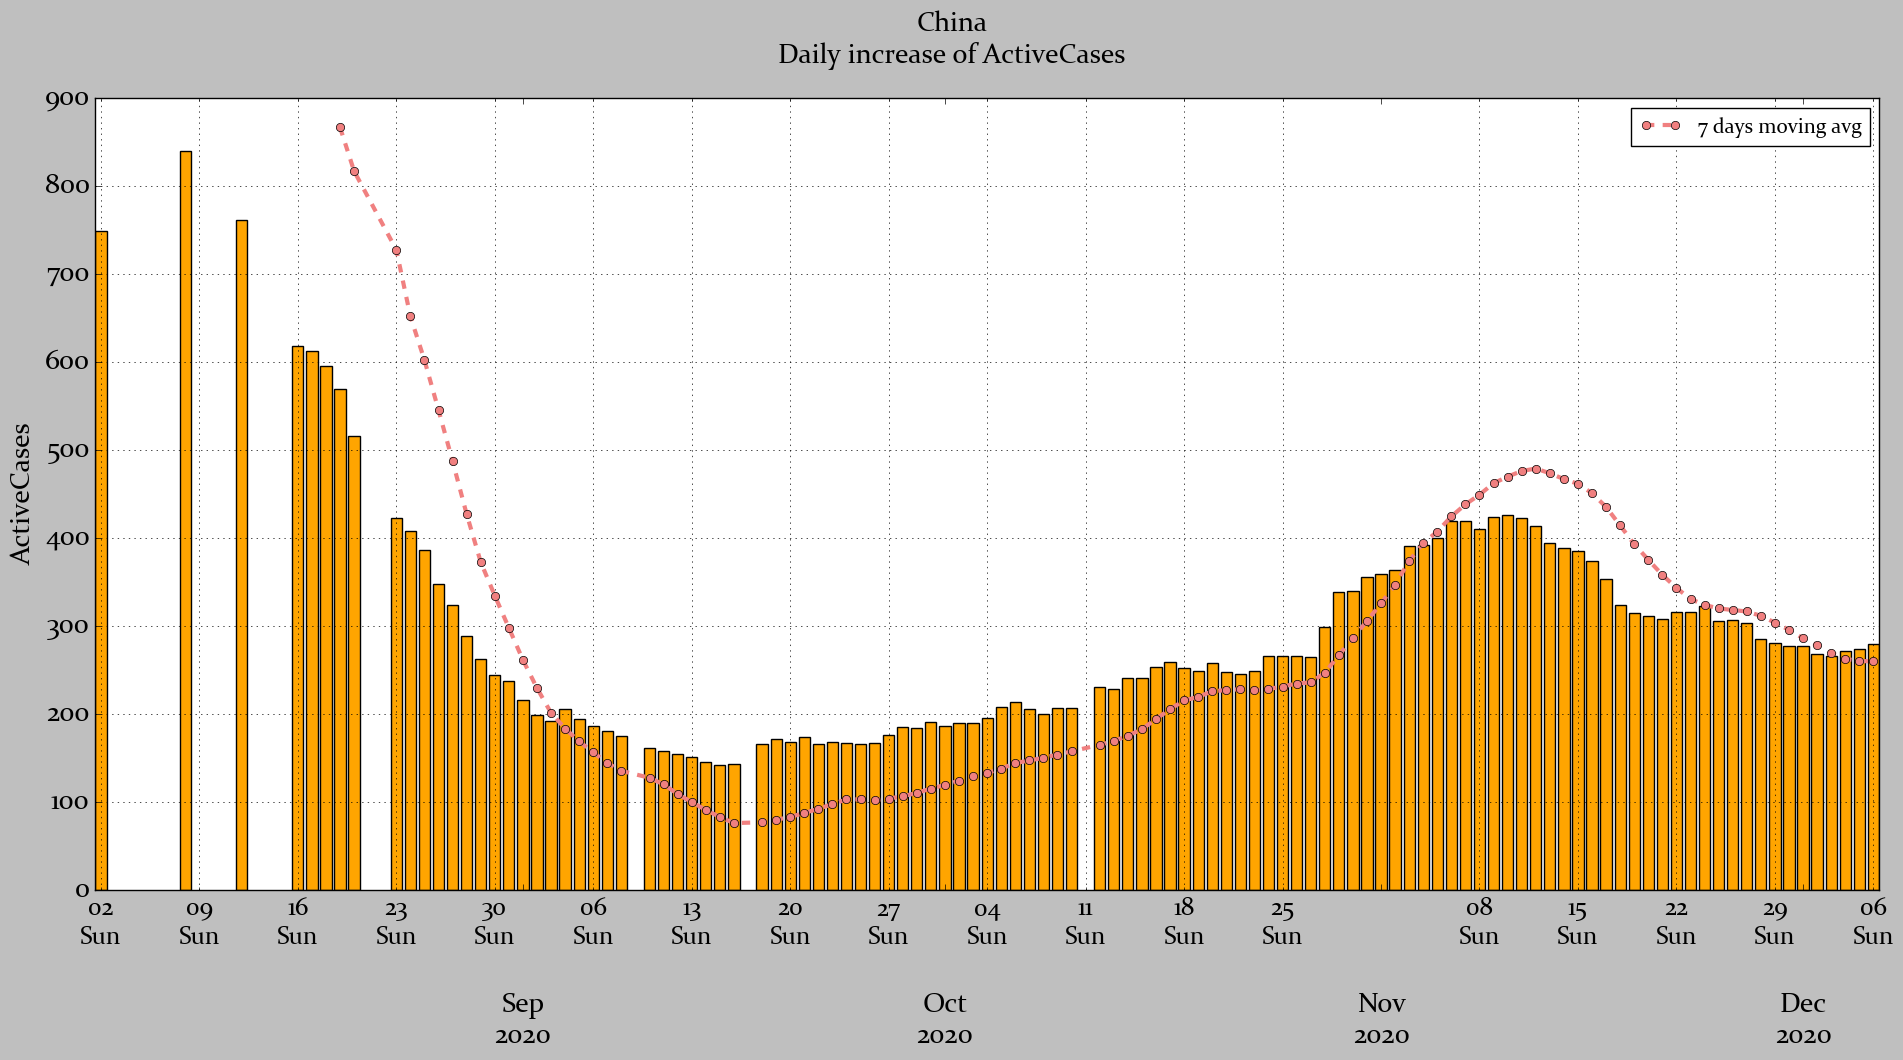

In [11]:
activeCases_rate = df['ActiveCases'].pct_change()
print('Answer:')
pd.DataFrame(activeCases_rate.tail(5))
country.daily_increase('ActiveCases', save = True)

In [12]:
newcase_rate = df['NewCases'].pct_change()
print('Answer:')
pd.DataFrame(newcase_rate.tail(5))
country.daily_increase2('NewCases', save = True)

Answer:


In [13]:
recovered_rate = df['NewRecovered'].pct_change()
print('Answer:')
pd.DataFrame(recovered_rate.tail(5))
country.daily_increase2('NewRecovered', save = True)

Answer:


In [14]:
death_rate = df['NewDeaths'].pct_change()
print('Answer:')
pd.DataFrame(death_rate.tail(5))
country.daily_increase2('NewDeaths', save = True)


Answer:


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
110        94.633%      5.367%
Total time taken in closed_cases_pie function is: 0.003316666666666667 minutes.


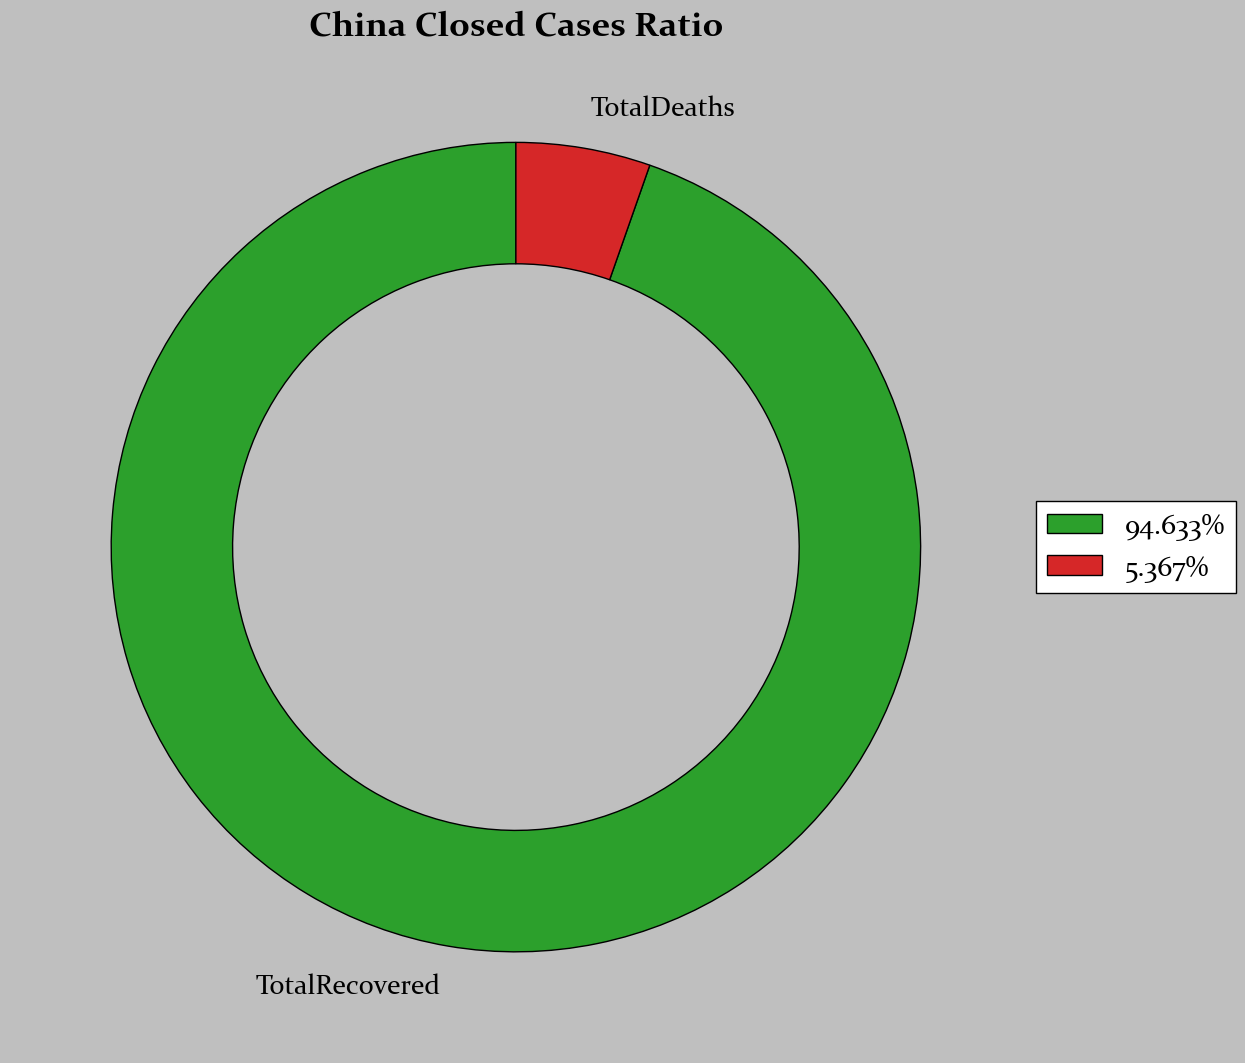

In [15]:
updated_totals = df[df['scrap_date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

#### Measures Boxplot

In [16]:
country.boxplot(['ActiveCases'], save=True)

In [17]:
measures = ['NewCases','NewRecovered']
country.boxplot(measures, save=True)

In [18]:
country.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [19]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['scrap_date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


scrap_date
1  2020-08-08

In [20]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'5.429%'